## Project 1: Public Policy, International Relations, and Government

### Lesson Goals
- Understand how to read and write from files
- Format the urls by editing strings with Python
- Extract information from articles
- Have a basic understanding of Natural Language Processing

### Final Product
- Graph the frequency of keywords from current sources on a news topic

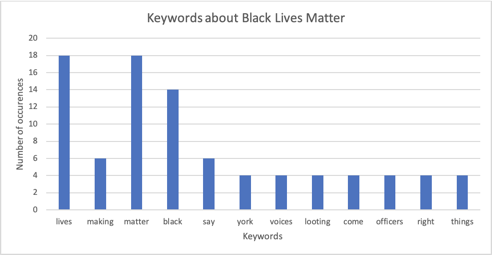

In [ ]:
# First we need to make sure our internet is on so we can install the following package
# Go under "Settings" on the right side and toggle "Internet" on. You will need to authenicate with your phone. 
!pip install -U newspaper3k

### Python Libraries

Today we will be importing and using two different python libraries: `newspaper` and `beautifulsoup`. "A **python library** is a reusable chunk of code that you may want to include in your programs/projects." Read more about python libraries [here](https://data-flair.training/blogs/python-libraries/#:~:text=A%20Python%20library%20is%20a,a%20collection%20of%20core%20modules).

Here is the documentation for each library. **Documentation** tells us how to use the libraries.
- [Newspaper3k](https://newspaper.readthedocs.io/en/latest/)
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Collections](https://docs.python.org/2/library/collections.html)


In [ ]:
# We will use Beautiful Soup to pull out website URLs
from bs4 import BeautifulSoup  

# We will use Newspaper3k to get information from the article and our input url
from newspaper import Article  

# We will use collections to count how many times a keywords appear
from collections import Counter

Start by googling any current events topic in a new tab. For example, google "Black Lives Matter" and clicked on the "News" tab. Then, copy and paste the url between the quotes and assign it to the variable "url."

In [ ]:
# Paste url here
url = ''

In [ ]:
# Let's get the html from the page using newspaper3k


We want to parse through the html to find references to links that we can look through; specify parser with the features tag.

In [ ]:
# Now we will use Beautiful Soup


We want to put all the urls we find in a text file that we can save and reference again in the future. The 'w' tag specifies that we want to write to our file. [Here](https://www.geeksforgeeks.org/reading-writing-text-files-python/) is reference for reading and writing to files in Python. 

The file we create will be called `sources.txt`, and this file will be created in the same folder unless it already exists there.

In [ ]:
# We create our file sources.txt here


In HTML, the "a" tag refers to a link. We're looking for links, so we want to pull "a" tags.

Here's an example: `<a href="https://developers.google.com/community/dsc">Google Developer Student Club Website</a>`.

Furthermore, `for-loops` are used in Python to iterate through objects in a list. In this case we want to iterate through each link on the page and write each link to our new file. 

In [ ]:
# We find all the links on the page using the beautiful soup library and a for-loop


Remember to close our file after writing to it.

In [ ]:
# Close sources.txt here


### STOP and think

Now we want to check the file and see what was extracted. You may notice that there is some extra information beyond just urls we can parse through. Taking a closer look, all the urls we want for articles are prefaced by the following string of characters `"/url?q="`, but we can easily remove this with a little python code. They also all end with `"&sa"` and more stuff, so we need to remove that as well. Also, the urls to the websites we want are printed twice.

### QUESTION: How can we ensure we're only pulling information from each url once?

Now we want to read in the file contents that we previously wrote to. To do this, let's use the read ("r") tag as described here. Then let's assign the entire text to a variable called `contents`.

In [ ]:
# Read from sources.txt file


Each url is printed on it's own line so we want to create a list of all the lines by splitting on the line break character. Let's create a list of cleaned urls called `cleaned_urls_list` and populate it with the urls that link to articles we want to examine.

In [ ]:
# Create cleaned_urls_list
cleaned_urls_list = [] # We will store our cleaned URLs here

all_urls_set = set(contents.split('\n'))  # The split command generates a list

# FILL IN THESE STRINGS
substring_to_remove_from_beginning = '' 
substring_to_remove_from_end = ''  # And everything that comes after is also junk

# Now let's iterate through the urls with a for-loop


In [ ]:
# String of all urls to save to a new file
all_cleaned_urls = "\n".join(cleaned_urls_list)  # This is a string

### STOP and think

On your own, try to save our list of cleaned urls to a new file called `cleaned_sources.txt`.

In [ ]:
# Save the string all_cleaned_urls to a file called cleaned_sources.txt


Now we can actually use the urls we collected. We can use Newspaper3k to get some fancier information from the article and do some natural language processing (NLP). Natural language processing refers to using computers and software to interact with text. We can use machine learning tools to understand langugage better.

In [ ]:
# All of our keywords will be stored in a list called all_keywords


Now we have a list of all the key words. Let's count how many time each word occurs.

In [ ]:
# Count the keywords
dictionary_of_keyword_counts = dict(Counter(all_keywords))
print(dictionary_of_keyword_counts)

Now we can write these words to a comma-separated file and read it into Excel. 

In [ ]:
import csv
keywords_csv = open('keywords.csv', 'w')
for key in dictionary_of_keyword_counts.keys():
    keywords_csv.write("%s,%s\n"%(key, dictionary_of_keyword_counts[key]))
keywords_csv.close()

Go to Excel and make a plot!

What if we only want keywords that show up a lot? Like more than 3 times? Well, we can use Python for that! Let's edit the code we wrote before and save it to a different file. 

In [ ]:
import csv
keywords_csv_more_words = open('keywords_more_words.csv', 'w')
for key in dictionary_of_keyword_counts.keys():
    # Write an if-statement will only execute if we have more than 3 of the same keywords
    
    keywords_csv_more_words.write("%s,%s\n"%(key, dictionary_of_keyword_counts[key]))
keywords_csv_more_words.close()

### As a bonus challenge, add to our previous code block to not include the keywords "black," "lives," and "matter" (or the equivalent for your topic) in our final plot.